In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
# Get the list of all shp files in BCN500 directory
dir_cat = [x for x in os.listdir("../data/divisions-administratives/") if x[-4:]==".shp"]
# first number: resolution/ scale, second number: Date
dir_cat = [x for x in os.listdir("../data/divisions-administratives/") if x[-21:]=="-1000000-20250730.shp"]
ids = {x:x[31:-21] for x in dir_cat}

In [3]:
ids

{'divisions-administratives-v2r1-vegueries-1000000-20250730.shp': 'vegueries',
 'divisions-administratives-v2r1-catalunya-1000000-20250730.shp': 'catalunya',
 'divisions-administratives-v2r1-municipis-1000000-20250730.shp': 'municipis',
 'divisions-administratives-v2r1-comarques-1000000-20250730.shp': 'comarques',
 'divisions-administratives-v2r1-provincies-1000000-20250730.shp': 'provincies'}

In [4]:
cat_maps = {}
maps = dir_cat[2]
cat_maps[ids[maps]] = gpd.read_file("../data/divisions-administratives/"+maps)
municipis = cat_maps[ids[maps]]


municipis['NOMREGIO'] = ""

# We build the regions that the Competencies data set uses
municipis.loc[municipis["NOMPROV"] == "Lleida", "NOMREGIO"] = "Lleida"
municipis.loc[municipis["NOMPROV"] == "Girona", "NOMREGIO"] = "Girona"
municipis.loc[municipis["NOMPROV"] == "Tarragona", "NOMREGIO"] = "Tarragona"
municipis.loc[municipis["NOMPROV"] == "Barcelona", "NOMREGIO"] = "Barcelona Comarques"

municipis.loc[municipis["NOMVEGUE"] == "Terres de l'Ebre", "NOMREGIO"] = "Terres de l'Ebre"
municipis.loc[municipis["NOMVEGUE"] == "Catalunya Central", "NOMREGIO"] = "Catalunya Central"

municipis.loc[municipis["NOMCOMAR"] == "Vallès Occidental", "NOMREGIO"] = "Vallès Occidental"
municipis.loc[municipis["NOMCOMAR"] == "Vallès Oriental", "NOMREGIO"] = "Maresme - Vallès Oriental"
municipis.loc[municipis["NOMCOMAR"] == "Maresme", "NOMREGIO"] = "Maresme - Vallès Oriental"
municipis.loc[municipis["NOMCOMAR"] == "Selva", "NOMREGIO"] = "Maresme - Vallès Oriental"

municipis.loc[municipis["NOMCOMAR"] == "Baix Llobregat", "NOMREGIO"] = "Baix Llobregat"

municipis.loc[municipis["NOMCOMAR"] == "Barcelonès", "NOMREGIO"] = "Consorci d'Educació de Barcelona"



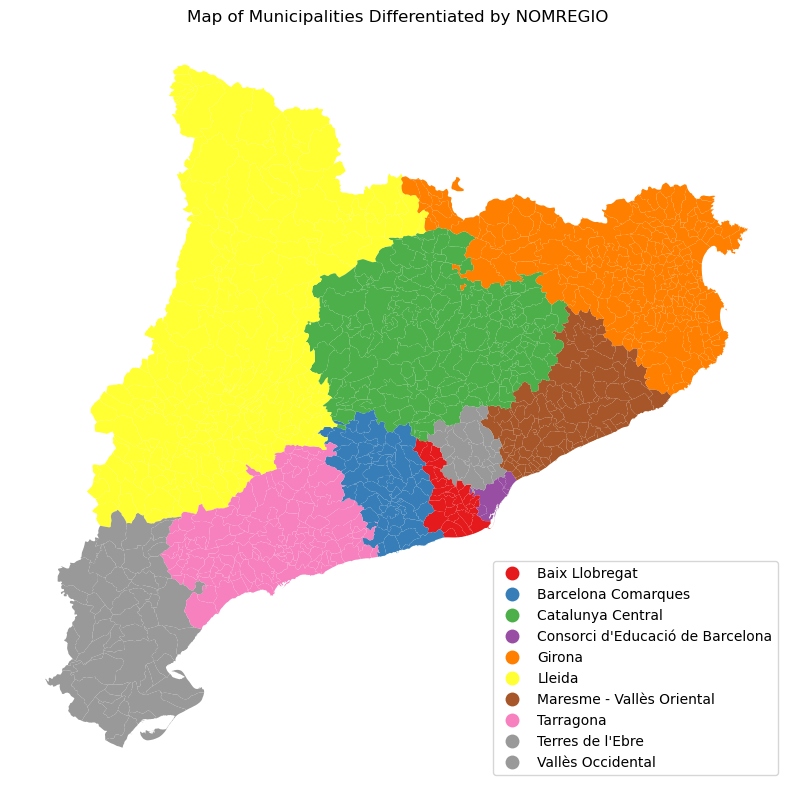

In [5]:
cat_mfig, ax = plt.subplots(figsize=(10, 10))
municipis.plot(column='NOMREGIO', ax=ax, legend=True, cmap='Set1', legend_kwds={'loc': 'lower right'})

# Customize the plot
plt.title('Map of Municipalities Differentiated by NOMREGIO')
plt.axis('off')  # Turn off the axes
plt.show()

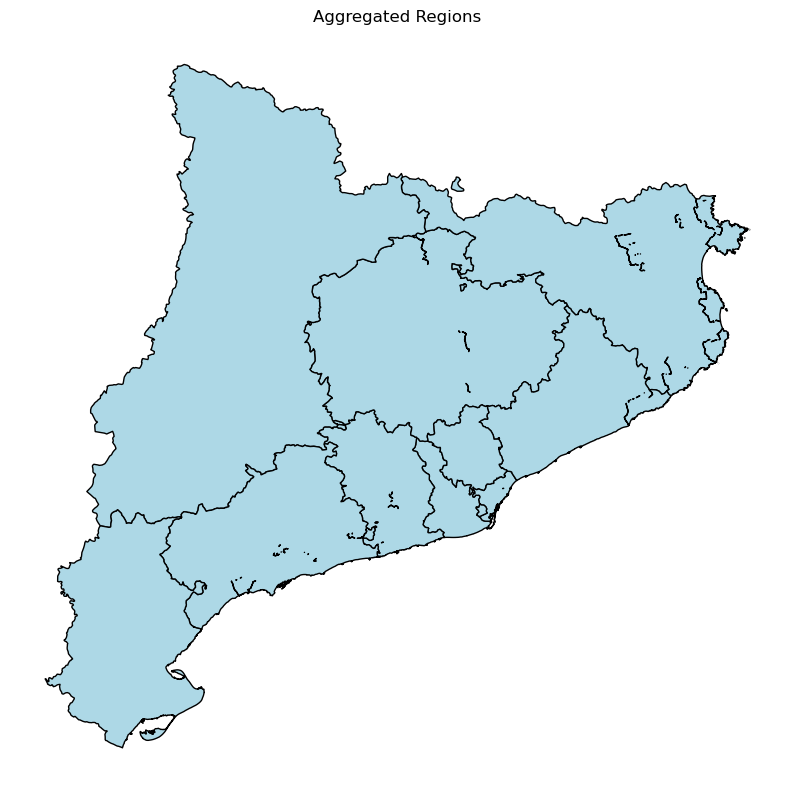

In [6]:
aggregated_regions = municipis.dissolve(by="NOMREGIO")

# Keep only the NOMREGIO and geometry columns in the new GeoDataFrame
aggregated_regions = aggregated_regions.reset_index()[["NOMREGIO", "geometry"]]

# Plot the aggregated regions
fig, ax = plt.subplots(figsize=(10, 10))
aggregated_regions.plot(ax=ax, color='lightblue', edgecolor='black')

# Customize the plot
plt.title('Aggregated Regions')
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [7]:
# Load from CSV
df_s = pd.read_csv("../Data/Secundaria.csv", header=0)
df_p = pd.read_csv("../Data/Primaria.csv", header=0)

# Replace empty values (or just spaces) with a NaN
df_s.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df_p.replace(r'^\s*$', np.nan, regex=True, inplace=True)

#  str -> float
cols_to_clean = [
    'ANY', 'ANY_NAIXEMENT', 'MES_NAIXEMENT',
    'PANG','PANG_CO','PANG_EE','PCAST','PCAST_CL','PCAST_EE',
    'PCAT','PCAT_CL','PCAT_EE','PFRAN','PFRAN_CO','PFRAN_EE',
    'PMAT','PMAT_CR','PMAT_EFM','PMAT_NC'
]

# euro decimal -> decimal
for col in cols_to_clean:
    if col in df_s.columns:
        df_s[col] = (
            df_s[col]
            .astype(str)
            .str.replace(',', '.', regex=False)
            .astype(float)
        )
        
    if col in df_p.columns:
        
        df_p[col] = (
            df_p[col]
            .astype(str)
            .str.replace(',', '.', regex=False)
            .astype(float)
        )

df_p['CODI_ALUMNE'] = df_p['CODI_ALUMNE'].astype(int)
df_s['CODI_ALUMNE'] = df_s['CODI_ALUMNE'].astype(int)

/var/folders/_m/vj49vq3972b166bph370j1kw0000gn/T/ipykernel_58890/4158600657.py:2: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s = pd.read_csv("../Data/Secundaria.csv", header=0)


In [8]:
municipis.to_file("../Data/map/municipis.shp", driver="ESRI Shapefile")
aggregated_regions.to_file("../Data/map/regions.shp", driver="ESRI Shapefile")

In [9]:
municipis = gpd.read_file("../data/map/municipis.shp")

/Users/peterclark/opt/anaconda3/envs/ub-bigdata-viz/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


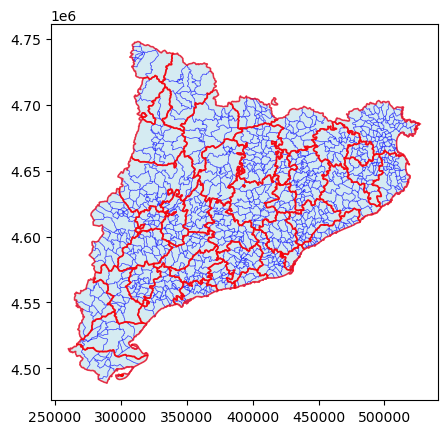

In [10]:
maps = dir_cat[3]
cat_maps[ids[maps]] = gpd.read_file("../data/divisions-administratives/"+maps, crs="EPSG:4326")
prvncs = cat_maps[ids[maps]]

fig, ax = plt.subplots(figsize=(5, 5))

municipis.plot(ax=ax, color='lightblue', edgecolor='blue', linewidth=0.5, alpha=0.5, label="Municipalities")
prvncs.plot(ax=ax, color='none', edgecolor='red', linewidth=1.2, alpha=0.7, label="Provinces")
plt.show()

In [58]:
df_s["CODI_ALUMNE"].groupby(by=df_s["AREA_TERRITORIAL"]).count()

AREA_TERRITORIAL
Alt Pirineu i Aran                    476
Baix Llobregat                      29793
Barcelona Comarques                 19939
Barcelonès                           4527
Catalunya Central                   17515
Consorci d'Educació de Barcelona    43327
Girona                              26046
Lleida                              12872
Maresme - Vallès Oriental           32731
Penedès                              4351
Tarragona                           20973
Terres de l'Ebre                     5169
Vallès Occidental                   36798
Name: CODI_ALUMNE, dtype: int64

In [59]:
df_p["CODI_ALUMNE"].groupby(by=df_s["AREA_TERRITORIAL"]).count()

AREA_TERRITORIAL
Alt Pirineu i Aran                    476
Baix Llobregat                      29333
Barcelona Comarques                 19662
Barcelonès                           4527
Catalunya Central                   17391
Consorci d'Educació de Barcelona    42753
Girona                              25721
Lleida                              12870
Maresme - Vallès Oriental           32610
Penedès                              4351
Tarragona                           20915
Terres de l'Ebre                     5105
Vallès Occidental                   36460
Name: CODI_ALUMNE, dtype: int64

In [43]:
regions = aggregated_regions.dissolve(by="NOMREGIO", as_index=False)

# 2. Merge your dataset
merged_s = regions.merge(
    df_s.groupby(by='AREA_TERRITORIAL', as_index=True)['PCAT'].mean(),
    left_on="NOMREGIO",
    right_on="AREA_TERRITORIAL",
    how="left"
)

merged_s_2 = regions.merge(
    df_s.groupby(by='AREA_TERRITORIAL', as_index=True)['PCAST'].mean(),
    left_on="NOMREGIO",
    right_on="AREA_TERRITORIAL",
    how="left"
)

merged_p = regions.merge(
    df_p.groupby(by='AREA_TERRITORIAL', as_index=True)['PCAT'].mean(),
    left_on="NOMREGIO",
    right_on="AREA_TERRITORIAL",
    how="left"
)

merged = merged_s.copy()

merged["PCAT"] = merged_s['PCAT'] - merged_p['PCAT']

In [40]:
merged_p

,NOMREGIO,geometry,PCAT
0,Baix Llobregat,"POLYGON ((416496.693 4568594.713, 416494.027 4...",75.283841
1,Barcelona Comarques,"MULTIPOLYGON (((386894.148 4561238.931, 386899...",74.371948
2,Catalunya Central,"MULTIPOLYGON (((374076.398 4610932.095, 374047...",76.182152
3,Consorci d'Educació de Barcelona,"MULTIPOLYGON (((430609.43 4575741.58, 430559 4...",77.459448
4,Girona,"MULTIPOLYGON (((498502.48 4622858.49, 498503.1...",76.001016
5,Lleida,"MULTIPOLYGON (((360549.37 4650061.257, 360797....",77.805170
6,Maresme - Vallès Oriental,"MULTIPOLYGON (((482722.454 4613228.564, 482724...",75.995383
7,Tarragona,"MULTIPOLYGON (((335054.71 4547030.22, 335055.0...",75.521629
8,Terres de l'Ebre,"MULTIPOLYGON (((300391.86 4494308.43, 300389.6...",77.255799
9,Vallès Occidental,"POLYGON ((427306.316 4588229.172, 427266.311 4...",75.381994


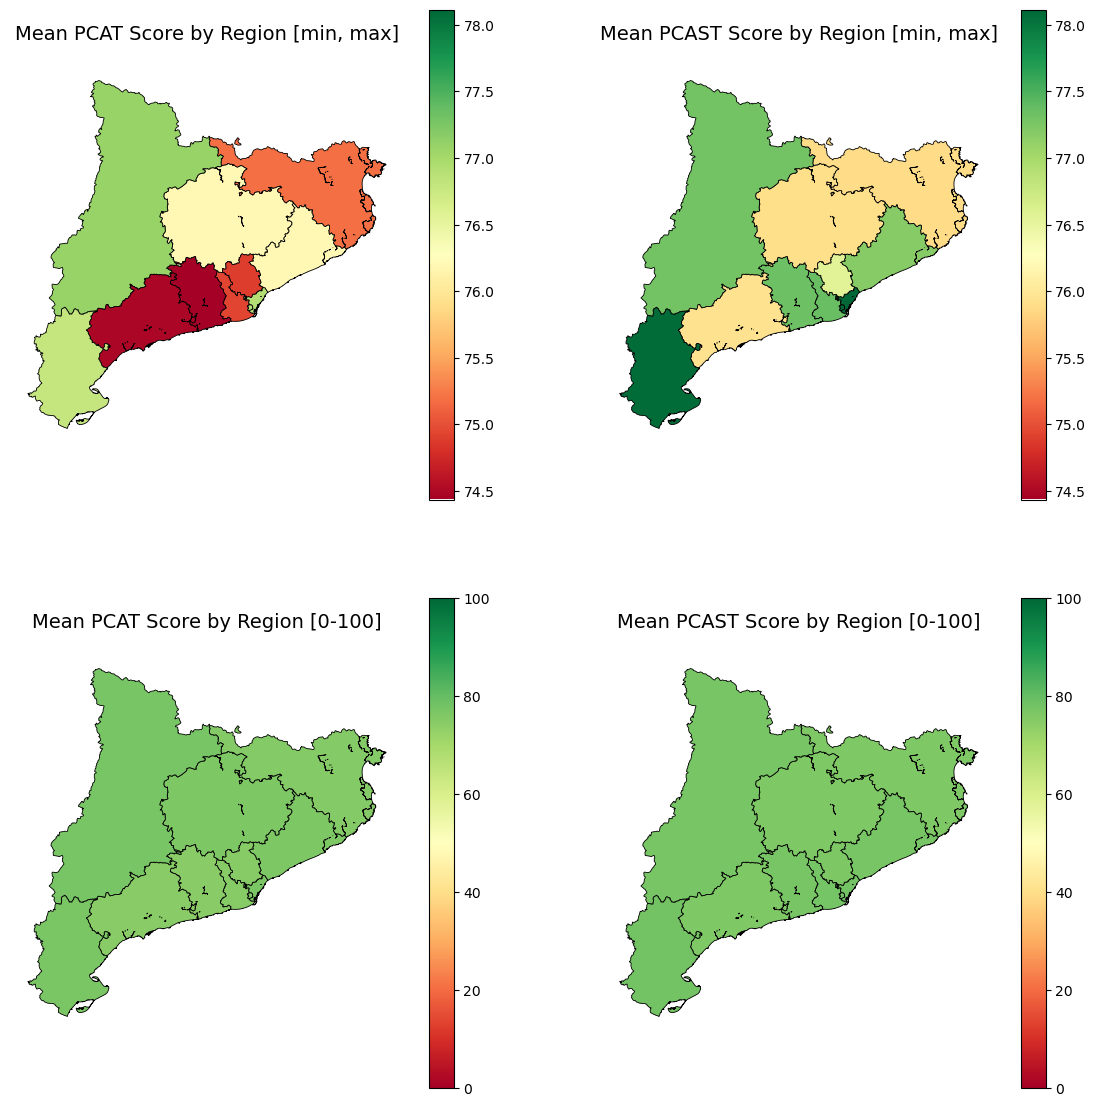

In [69]:
fig, ((ax1, ax2),( ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))

vmin = min(merged_s_2['PCAST'].min(),merged_s['PCAT'].min())
vmax =max(merged_s_2['PCAST'].max(),merged_s['PCAT'].max())

merged_s.plot(
    column='PCAT',
    cmap='RdYlGn',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax1,
    vmin=vmin,
    vmax=vmax
)

merged_s_2.plot(
    column='PCAST',
    cmap='RdYlGn',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax2,
    vmin=vmin,
    vmax=vmax
    
)

vmin,vmax=0,100
merged_s.plot(
    column='PCAT',
    cmap='RdYlGn',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax3,
    vmin=vmin,
    vmax=vmax
)
merged_s_2.plot(
    column='PCAST',
    cmap='RdYlGn',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax4,
    vmin=vmin,
    vmax=vmax
    
)

ax1.set_axis_off()
ax1.set_title('Mean PCAT Score by Region [min, max]', fontsize=14)
ax2.set_axis_off()
ax2.set_title('Mean PCAST Score by Region [min, max]', fontsize=14)

ax3.set_title('Mean PCAT Score by Region [0-100]', fontsize=14)
ax2.set_axis_off()
ax4.set_title('Mean PCAST Score by Region [0-100]', fontsize=14)

ax3.set_axis_off()
ax4.set_axis_off()
plt.show()